<a href="https://colab.research.google.com/github/bcury/Python-Projects/blob/main/Finan%C3%A7as_aloca%C3%A7%C3%A3o_e_otimiza%C3%A7%C3%A3o_de_portf%C3%B3lios_algoritimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


- Alocação aleatória de ativos

In [4]:
len(dataset.columns) - 1

6

In [5]:
dataset.loc[len(dataset) - 1]['BOVA']

92.41000366210938

In [6]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [7]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, 10)

In [8]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.763673,1316.288069,833.710425,380.156147,4984.683405,-0.306332
2,1350.392100,34.863773,1084.437134,1298.945650,781.573105,382.290029,4932.501791,-1.046839
3,1291.795217,34.557537,1072.014590,1342.304468,776.046225,395.175284,4911.893321,-0.417810
4,1266.935952,33.332592,1090.113087,1331.899017,794.066437,398.129839,4914.476924,0.052599
...,...,...,...,...,...,...,...,...
1441,1651.367094,33.379707,7682.429339,141236.798956,686.048657,786.246983,152076.270736,-0.066212
1442,1502.211333,30.081783,7304.030139,136686.134989,661.976774,758.588795,146943.023813,-3.375442
1443,1474.688596,29.869773,7386.170428,140737.335967,686.048657,762.528265,151076.641685,2.813075
1444,1393.007983,28.927508,6998.542117,136686.134989,649.940833,744.062131,146500.615560,-3.028944


In [9]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1441    2020-10-27
1442    2020-10-28
1443    2020-10-29
1444    2020-10-30
1445    2020-11-03
Name: Date, Length: 1446, dtype: object

In [10]:
acoes_pesos

,Ações,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [11]:
soma_valor

150607.25846015807

-  Visualização dos dados

In [12]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [13]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [14]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

- Mais cálculos no portfólio

**Retorno acumulado em todo o período**

In [15]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

29.121451692031616

- Desvio padrão

In [16]:
dataset['taxa retorno'].std()

2.8167443147613374

- Sharpe ratio

In [17]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

1.5341112767145668

In [18]:
dinheiro_total = 5000

In [19]:
soma_valor - dinheiro_total

145607.25846015807

In [20]:
# Taxa selic: 
taxa_selic_2015 = 12.75
taxa_selic_2016 = 14.25
taxa_selic_2017 = 12.25
taxa_selic_2018 = 6.50
taxa_selic_2019 = 5.0
taxa_selic_2020 = 2.0

In [21]:
valor_2015 = dinheiro_total + (dinheiro_total * taxa_selic_2015 / 100)
valor_2015

5637.5

In [22]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6440.84375

In [23]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

7229.8471093749995

In [24]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7699.787171484374

In [25]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

8084.7765300585925

In [26]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

8246.472060659764

In [27]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

3246.472060659764

In [28]:
ir = rendimentos * 15 / 100
ir

486.9708090989646

In [29]:
valor_2020 - ir

7759.5012515608

In [30]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
taxa_selic_historico.mean() / 100

0.08791666666666666

In [31]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

1.044567717879135

**Otimização de portfólio - randômico**



In [32]:
import sys
1 - sys.maxsize

-9223372036854775806

In [33]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0
  
  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)
    
    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [34]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 5000, taxa_selic_historico.mean() / 100, 1000)

In [35]:
sharpe_ratio, melhores_pesos

(1.5619692345460763,
 array([0.00414986, 0.04300667, 0.23449471, 0.34400729, 0.09446242,
        0.27987905]))

In [36]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhores_pesos)

In [37]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0   GOL   0.414986
 1   CVC   4.300667
 2  WEGE  23.449471
 3  MGLU  34.400729
 4  TOTS   9.446242
 5  BOVA  27.987905, 198082.38267450326)

In [38]:
print(ls_retorno)

[0.2700275714598437, 0.5468515787495574, 0.3212721424787289, 0.5022743823458818, 0.4548274888464415, 0.5398113929191143, 0.5549806485796855, 0.33773541881325925, 0.46286949549920287, 0.5342248042722894, 0.6463871106687636, 0.20612923748944986, 0.5006090986384015, 0.4623874098965904, 0.6323088806642341, 0.4805174213367298, 0.5881936437125228, 0.5349072746824675, 0.4135701071103463, 0.5732898167594592, 0.3084630942201833, 0.5819199748805743, 0.543875079823675, 0.4968989492065007, 0.5976026598833581, 0.5379316606689509, 0.5696453756556061, 0.5307732273617857, 0.397081887184388, 0.11398691755756181, 0.49774458218660056, 0.4560348124189272, 0.5682784635789176, 0.5552662881095234, 0.4239667812074227, 0.3357110527775064, 0.5027869715697358, 0.5540565066835222, 0.49147572280600355, 0.49117309960420913, 0.41941313180884227, 0.41668706146764434, 0.28858213070264827, 0.5790423004576727, 0.3500870312157811, 0.17709747637621542, 0.4424244236318082, 0.6198388330427766, 0.5315516521419436, 0.51088494

In [39]:
print(ls_volatilidade)

[0.34559109383735054, 0.3369552655508682, 0.40383576034927127, 0.3521230340007986, 0.40388090520644276, 0.3621335934514903, 0.3584399240420494, 0.38874883734372495, 0.3564379693839108, 0.41326367849474316, 0.3872226743959293, 0.35390316819249995, 0.4062213209295674, 0.34793695206266495, 0.4215466328083608, 0.40046136068385574, 0.35708362499629875, 0.3885751377467397, 0.3789182222834081, 0.3794427739502363, 0.3037942450244161, 0.34500250514108394, 0.3403751370523641, 0.4245987776503987, 0.37437934825799557, 0.4448175523143702, 0.34141777933625933, 0.3747448565717098, 0.36351432802710265, 0.3818408172036827, 0.39203623801947696, 0.3101161553532157, 0.3385773457096267, 0.34471451544876475, 0.344641869825529, 0.2806382034674432, 0.34413964741890907, 0.366953404850524, 0.3581501995474015, 0.3274489318501969, 0.35419809214530207, 0.3829765128996306, 0.4040274252128353, 0.3974740955798951, 0.4158483318147269, 0.4000757488235048, 0.42742724656929115, 0.40299152053789106, 0.4327737222677917, 0.

In [40]:
print(ls_sharpe_ratio)

[0.5269548551470657, 1.3620054618603608, 0.5778474784160688, 1.1767412968453392, 0.9084629093624251, 1.247867456717962, 1.30304676065668, 0.6426225062268346, 1.0519441278397688, 1.0799597468406599, 1.4422462343490492, 0.33402518385617663, 1.0159300132926539, 1.0762603425993107, 1.291416350240552, 0.9803711249435669, 1.4010078929019545, 1.1503324958148362, 0.8594293472645673, 1.279173523426879, 0.7259730266970371, 1.4318832496937723, 1.3395761426806643, 0.9632205839192904, 1.3614158889593777, 1.0116844348000027, 1.410965503687168, 1.1817548738267356, 0.8504897790292075, 0.0682751809558083, 1.045382737040684, 1.187033114521176, 1.4187653220136665, 1.355758462432138, 0.9750704831971738, 0.8829674044702411, 1.2055289415638362, 1.2702970836494472, 1.1267871877478195, 1.2315093857811892, 0.935906975484742, 0.8584609857971653, 0.4966629775943408, 1.2356167087429382, 0.6304470752714703, 0.2229098113839719, 0.8293990610345228, 1.319933892569574, 1.0250968639005409, 1.1047539144237246, 1.4396720

In [41]:
melhor_retorno, melhor_volatilidade

(0.6259296653087537, 0.34444532372523906)

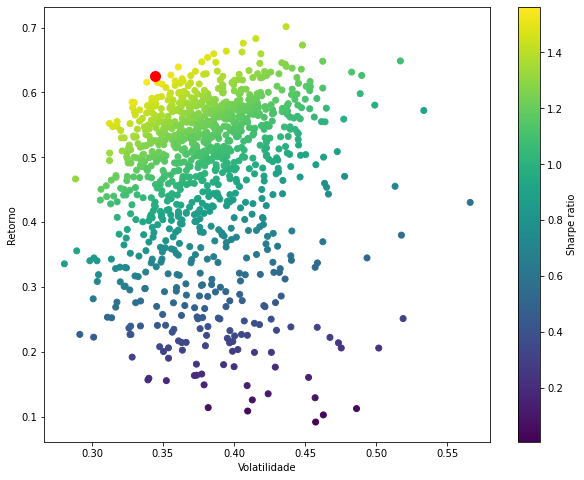

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

**Otimização de portfólio com algoritmos de otimização**



In [43]:
!pip install mlrose

In [58]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [59]:
 import mlrose

In [46]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [47]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [48]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [49]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [50]:
fitness_function(pesos)

1.044567717879135

In [51]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [52]:
visualiza_alocacao(pesos)

GOL 26.617195545614496
CVC 0.7161207195395352
WEGE 21.866313475981215
MGLU 25.84017365648649
TOTS 17.202779081759033
BOVA 7.757417520619242


In [60]:
fitness = mlrose.CustomFitness(fitness_function)

In [61]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [62]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

- Hill climb

In [63]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
melhor_solucao, melhor_custo

(array([0.        , 0.22032449, 0.10011437, 0.90233257, 0.        ,
        0.        ]), 1.270681157037088)

In [64]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.18018453, 0.08187497, 0.7379405 , 0.        ,
        0.        ]), 0.9999999999999999)

In [65]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 18.018452678413226
WEGE 8.187496981804403
MGLU 73.79405033978236
TOTS 0.0
BOVA 0.0


In [66]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

404578.3008863211

In [67]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.        , 0.32032449, 0.        , 0.        , 0.64675589,
        0.49233859]), -0.3966947924158746)

In [68]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.        , 0.21948769, 0.        , 0.        , 0.44315985,
        0.33735247]), 0.9999999999999999)

In [69]:
visualiza_alocacao(pior_solucao)

GOL 0.0
CVC 21.94876851988625
WEGE 0.0
MGLU 0.0
TOTS 44.31598465629341
BOVA 33.73524682382033


In [70]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=pior_solucao)
soma_valor

5926.919066862072

 **Simulated annealing**

In [71]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.        , 0.15384615, 0.15384615, 0.69230769, 0.        ,
        0.        ]), 1.2707841514378275)

In [72]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 15.384615384615389
WEGE 15.384615384615389
MGLU 69.23076923076923
TOTS 0.0
BOVA 0.0


In [73]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

382055.77815722366

 **Algoritmo genético**
 

In [74]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length = 6, fitness_fn = fitness, 
                                               maximize = True, min_val = 0.1, max_val = 1)

In [75]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.05486587, 0.15198019, 0.09752971, 0.54073661, 0.06577971,
        0.08910791]), 1.2323078658475695)

In [76]:
visualiza_alocacao(melhor_solucao)

GOL 5.4865870615535615
CVC 15.19801923856264
WEGE 9.752971254516094
MGLU 54.07366085916957
TOTS 6.577970925624096
BOVA 8.91079066057405


In [77]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 5000, melhores_pesos=melhor_solucao)
soma_valor

299210.8074659617